# Classification of Concrete Images Using Decision Tree: Test Notebook

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import scipy as sp
%matplotlib inline

from skimage.transform import rescale

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, roc_curve
from joblib import load

## Decision Tree Classification

### 75% train, 25% test

### DecisionTreeClassifier

In [38]:
dtree = load("dtree.joblib")
X_test = load("X_test.joblib")
y_test = load("y_test.joblib")

In [39]:
y_pred = dtree.predict(X_test)

#### Evaluate Results

In [40]:
#classification report
target_names = ['class 0: uncracked','class 1: cracked']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

class 0: uncracked       0.85      0.80      0.83      2529
  class 1: cracked       0.20      0.26      0.22       471

          accuracy                           0.72      3000
         macro avg       0.52      0.53      0.53      3000
      weighted avg       0.75      0.72      0.73      3000



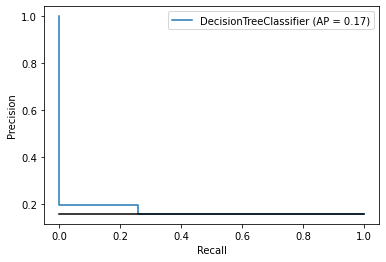

In [34]:
#PR Curve
zeroList = []
oneList = []

for i in y_test:
    if i == 0:
        zeroList.append(i)
    elif i == 1:
        oneList.append(i)
    
y_ax = len(oneList)/(len(zeroList)+len(oneList))

plot_precision_recall_curve(dtree,X_test,y_test)
plt.plot([0,1],[y_ax,y_ax],c='k')
plt.legend(loc='best')

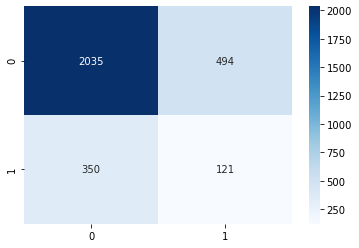

In [35]:
#confusion matrix
cf = confusion_matrix(y_test,y_pred)

#https://www.kaggle.com/arunmohan003/pruning-decision-trees-tutorial?scriptVersionId=64484232
sns.heatmap(cf,annot=True,cmap='Blues',fmt='g')
plt.show()

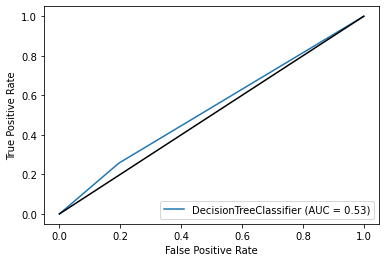

In [36]:
#ROC curve
#https://www.youtube.com/watch?v=YrceRETSuUI
plot_roc_curve(dtree,X_test,y_test)
plt.plot([0,1],[0,1], c='k')